In [143]:
import numpy as np
import matplotlib.pyplot as plt

In [144]:
# Signal parameters
f_signal = 2         # Signal frequency = 5 Hz
fs = 1000             # Sampling rate = 1000 samples per second
t = np.linspace(0, 1, fs)   # Time axis: 1 second duration

# Analog signal (what comes from antenna)
analog_signal_sin = np.sin(2 * np.pi * f_signal * t)
analog_signal_cos = np.cos(2 * np.pi * f_signal * t)

In [145]:
print(len(t))
# print(analog_signal_sin)
print(len(analog_signal_sin))
print(max(analog_signal_sin), min(analog_signal_sin))


1000
1000
0.9999987638285974 -0.9999987638285974


In [146]:
def quantize(signal, bits, vmin=-1.0, vmax=1.0):
    levels = 2 ** bits
    step = (vmax - vmin) / levels #step = LSB weight (change in 1 bit after the chnage in weight)
    
    quantized = []

    for x in signal:
        # Saturation
        if x <= vmin:
            x = vmin
        elif x >= vmax:
            x = vmax

        code = np.floor((x - vmin) / step)
        x_q = (code + 0.5) * step + vmin
        quantized.append(x_q)
    return np.array(quantized)


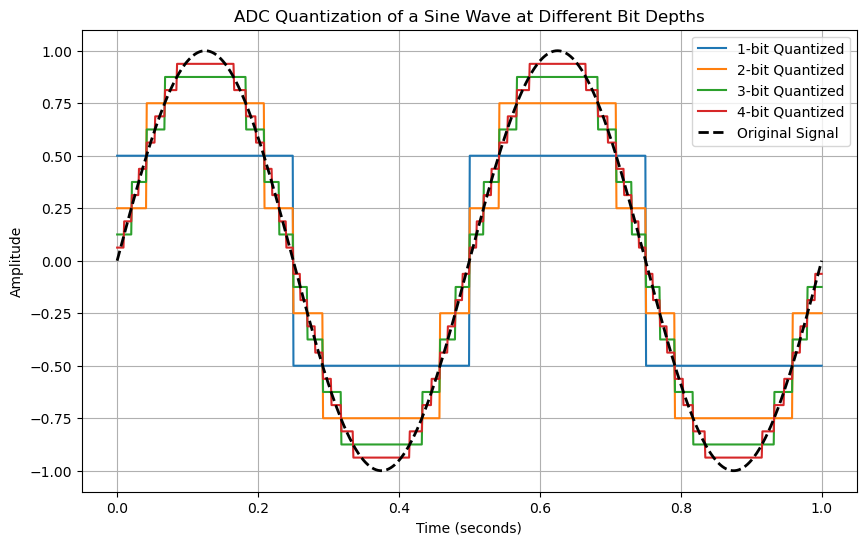

In [147]:
bit_depths = [1, 2, 3, 4]

plt.figure(figsize=(10, 6))

for bits in bit_depths:
    q_signal = quantize(analog_signal_sin, bits)
    plt.plot(t, q_signal, label=f"{bits}-bit Quantized")

# Plot original analog signal
plt.plot(t, analog_signal_sin, 'k--', linewidth=2, label="Original Signal")

plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.title("ADC Quantization of a Sine Wave at Different Bit Depths")
plt.legend()
plt.grid(True)
plt.show()


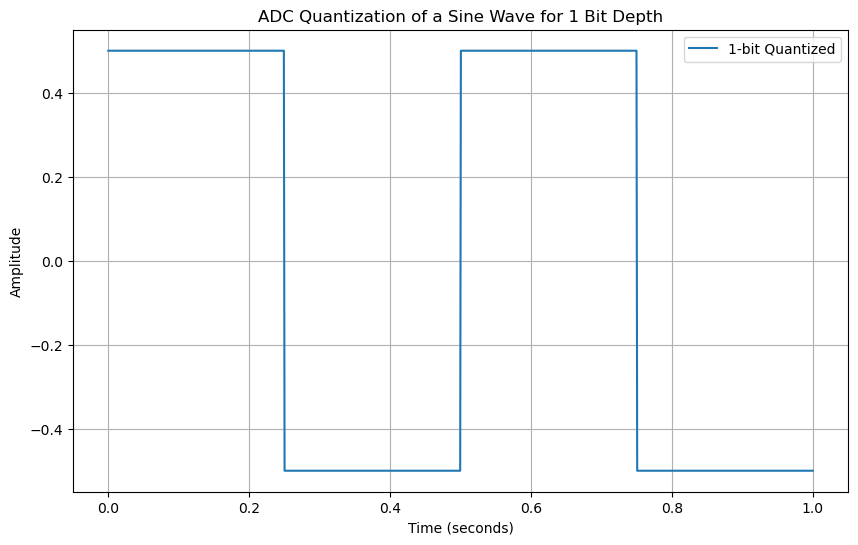

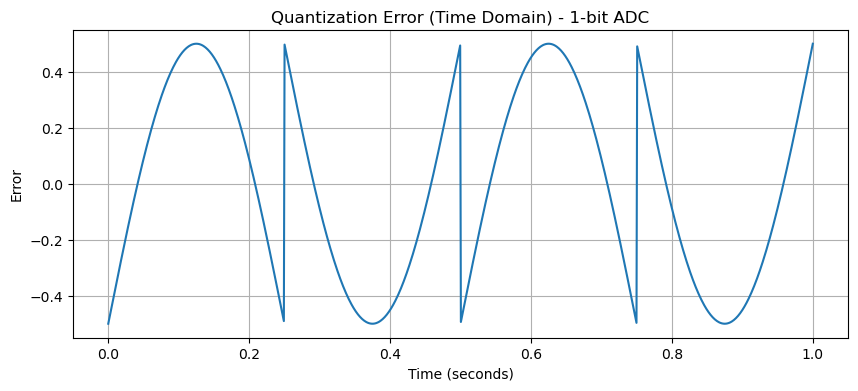

In [148]:
plt.figure(figsize=(10, 6))
q_signal = quantize(analog_signal_sin, 1)
plt.plot(t, q_signal, label=f"{1}-bit Quantized")
quantization_error = analog_signal_sin - q_signal
    
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.title("ADC Quantization of a Sine Wave for 1 Bit Depth")
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 4))
plt.plot(t, quantization_error)
plt.title(f"Quantization Error (Time Domain) - {1}-bit ADC")
plt.xlabel("Time (seconds)")
plt.ylabel("Error")
plt.grid(True)
plt.show()

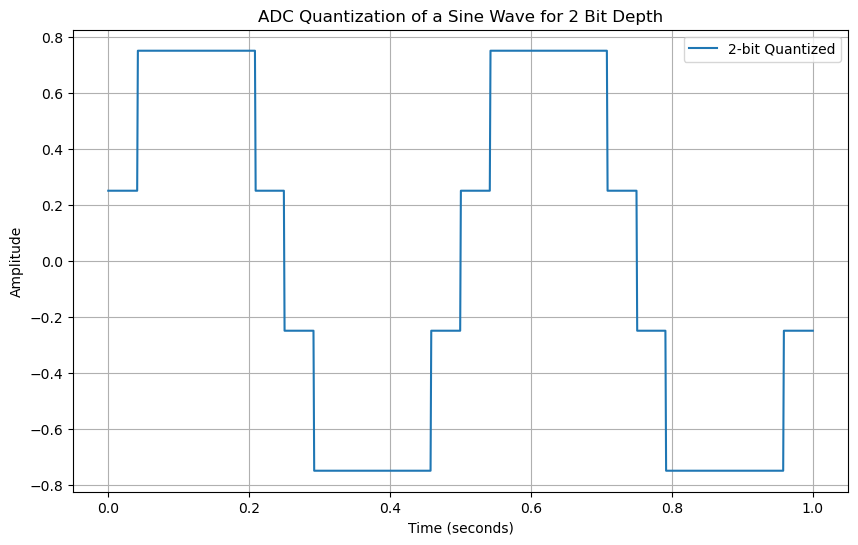

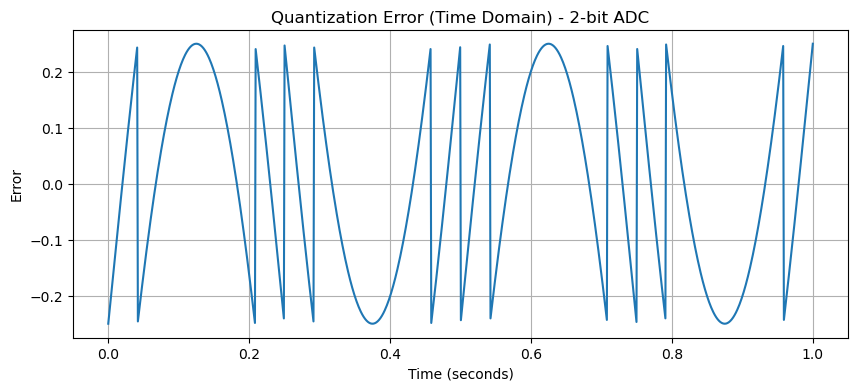

In [149]:
plt.figure(figsize=(10, 6))
q_signal = quantize(analog_signal_sin, 2)
plt.plot(t, q_signal, label=f"{2}-bit Quantized")
quantization_error = analog_signal_sin - q_signal


    
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.title("ADC Quantization of a Sine Wave for 2 Bit Depth")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(t, quantization_error)
plt.title(f"Quantization Error (Time Domain) - {2}-bit ADC")
plt.xlabel("Time (seconds)")
plt.ylabel("Error")
plt.grid(True)
plt.show()

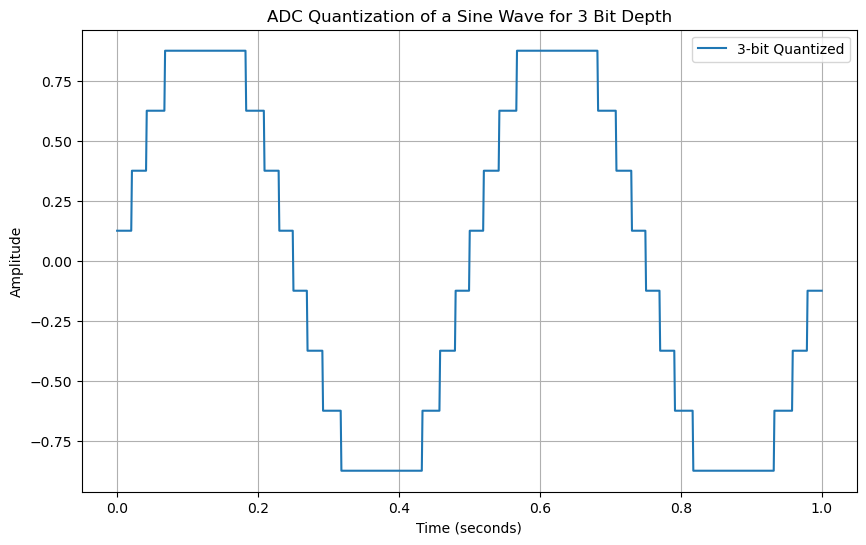

In [150]:
plt.figure(figsize=(10, 6))
q_signal = adc_quantize(analog_signal_sin, 3)
plt.plot(t, q_signal, label=f"{3}-bit Quantized")
    
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.title("ADC Quantization of a Sine Wave for 3 Bit Depth")
plt.legend()
plt.grid(True)
plt.show()

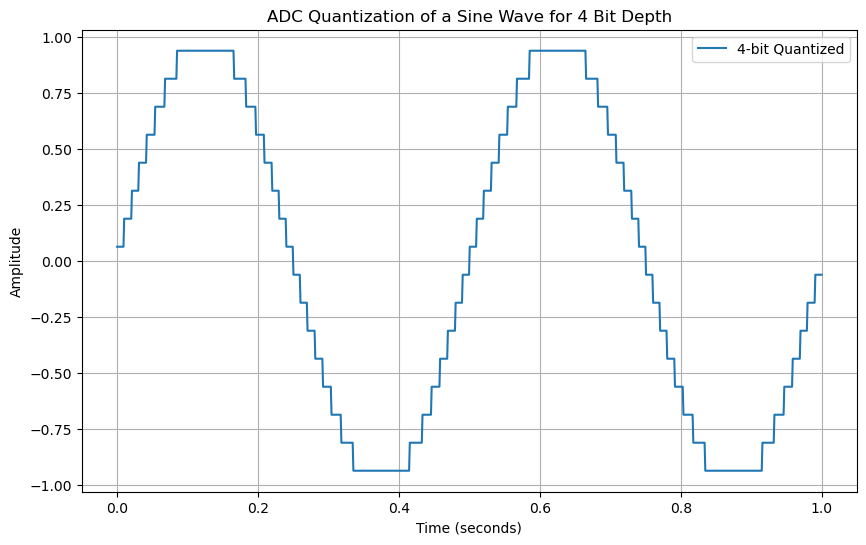

In [151]:
plt.figure(figsize=(10, 6))
q_signal = quantize(analog_signal_sin, 4)
plt.plot(t, q_signal, label=f"{4}-bit Quantized")    


plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.title("ADC Quantization of a Sine Wave for 4 Bit Depth")
plt.legend()
plt.grid(True)
plt.show()

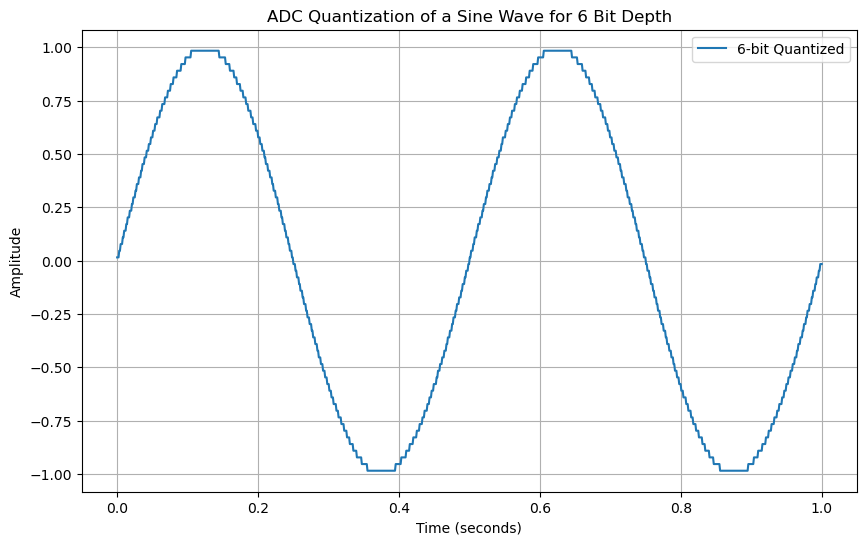

In [152]:
plt.figure(figsize=(10, 6))
q_signal = quantize(analog_signal_sin, 6)
plt.plot(t, q_signal, label=f"{6}-bit Quantized")
    
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.title("ADC Quantization of a Sine Wave for 6 Bit Depth")
plt.legend()
plt.grid(True)
plt.show()

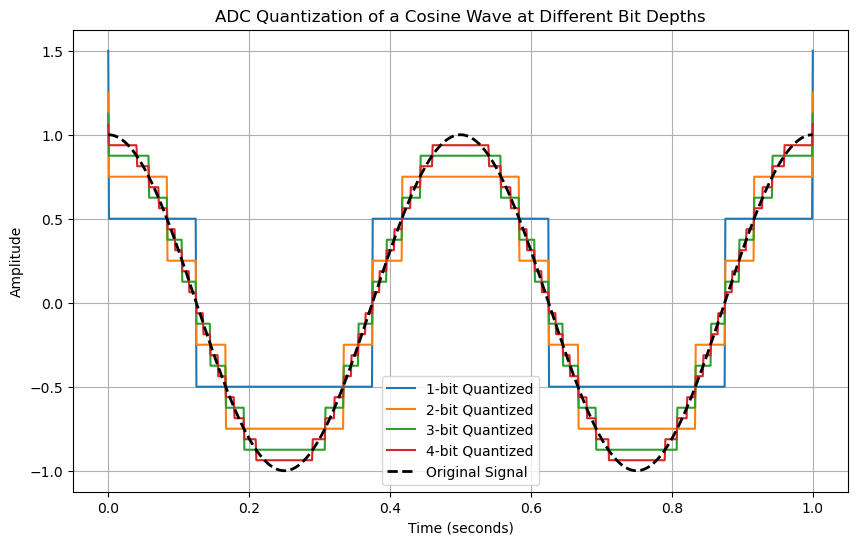

In [153]:
plt.figure(figsize=(10, 6))

for bits in bit_depths:
    q_signal = quantize(analog_signal_cos, bits)
    plt.plot(t, q_signal, label=f"{bits}-bit Quantized")
    

# Plot original analog signal
plt.plot(t, analog_signal_cos, 'k--', linewidth=2, label="Original Signal")

plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.title("ADC Quantization of a Cosine Wave at Different Bit Depths")
plt.legend()
plt.grid(True)
plt.show()


In [154]:
#input Sine Wave: 
f_signal = 2         # Signal frequency = 5 Hz
fs = 50           # Sampling rate = 10 samples per second
t = np.linspace(0, 1, fs)   # Time axis: 1 second duration

# Analog signal (what comes from antenna)
analog_signal_sin = np.sin(2 * np.pi * f_signal * t)

bits = 2
q_signal = quantize(analog_signal_sin, bits)
print(q_signal)

[ 0.25  0.25  0.25  0.75  0.75  0.75  0.75  0.75  0.75  0.75  0.75  0.25
  0.25 -0.25 -0.25 -0.75 -0.75 -0.75 -0.75 -0.75 -0.75 -0.75 -0.75 -0.25
 -0.25  0.25  0.25  0.75  0.75  0.75  0.75  0.75  0.75  0.75  0.75  0.25
  0.25 -0.25 -0.25 -0.75 -0.75 -0.75 -0.75 -0.75 -0.75 -0.75 -0.75 -0.25
 -0.25 -0.25]


In [155]:
#important parameters
Vref_max  = 1.0
Vref_min = -1.0
Vref = Vref_max - Vref_min

Amp_min = min(q_signal)
Amp_max = max(q_signal)

print(Amp_min, Amp_max)

-0.75 0.75


In [156]:
LSB_weight = Vref/ (2**bits)
print(LSB_weight)

0.5


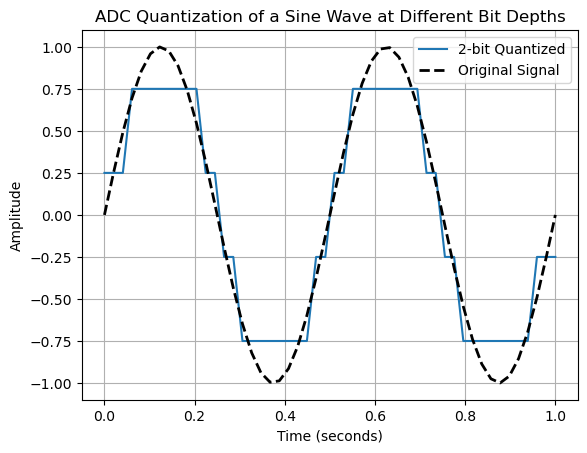

In [157]:
plt.plot(t, q_signal, label=f"{bits}-bit Quantized")

# Plot original analog signal
plt.plot(t, analog_signal_sin, 'k--', linewidth=2, label="Original Signal")

plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.title("ADC Quantization of a Sine Wave at Different Bit Depths")
plt.legend()
plt.grid(True)
plt.show()


In [158]:
output = []
for index, val in enumerate(q_signal):
    code = int((val - Amp_min)/LSB_weight)
#     print(val, code)
    output.append(bin(code)[2:])
    
binary_output = [f"{int(i, 2):02b}" for i in output]
print(binary_output)

['10', '10', '10', '11', '11', '11', '11', '11', '11', '11', '11', '10', '10', '01', '01', '00', '00', '00', '00', '00', '00', '00', '00', '01', '01', '10', '10', '11', '11', '11', '11', '11', '11', '11', '11', '10', '10', '01', '01', '00', '00', '00', '00', '00', '00', '00', '00', '01', '01', '01']
